In [1]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
plt.rcParams.update({'font.size': 15})

# SIR Model
The SIR model is one of the most basic of compartmental models in mathematical epidemiology. The model subdivides a population into three states, susceptible, infected and recovered. There are various extensions to this model which add additional states such as the SIRS model and the SEIR model. The following SIR model is derived from Law of Mass Action dynamics   
\begin{align}
    \frac{dS}{dt} &= -\beta SI \\
    \frac{dI}{dt} &=\beta SI -\gamma I\\
    \frac{dR}{dt} &= \gamma I
\end{align}

In [2]:
# Initialise Params
params = dict()
params['beta'] = 0.01      
params['gamma'] = 0.02

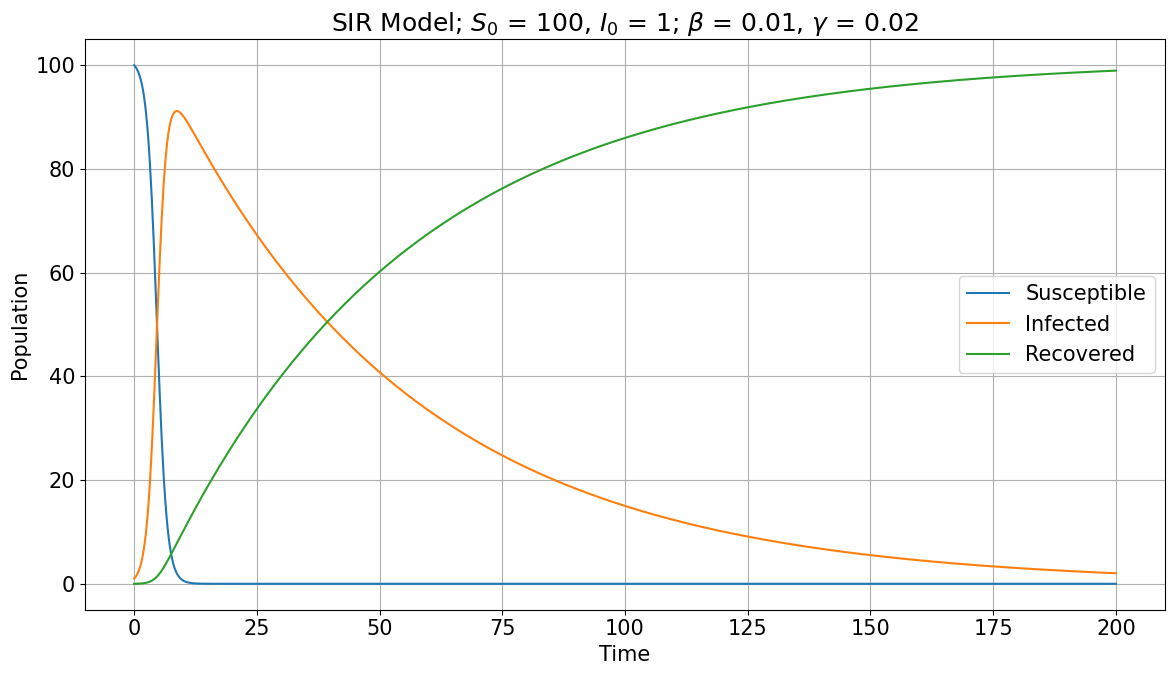

In [3]:
def SIR(x,t,params = params):
    s,i,r = x

    dxdt = [-params['beta']*s*i,
            params['beta']*s*i -params['gamma']*i,
            params['gamma']*i
            ]
    return dxdt

# Initial Condition
x0 = [100,1,0.0]
t = np.linspace(0, 200, 1000)
sol = odeint(SIR, x0, t)
fig, ax = plt.subplots(1,figsize = (12,7))
ax.plot(t, sol[:, 0], label='Susceptible')
ax.plot(t, sol[:, 1], label='Infected')
ax.plot(t, sol[:, 2], label='Recovered')
ax.set_title(f'SIR Model; $S_0$ = {x0[0]}, $I_0$ = {x0[1]}; $\\beta$ = {params["beta"]}, $\gamma$ = {params["gamma"]}')
ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.grid()
plt.tight_layout()
plt.show()

/var/folders/_m/40jm_4wj5hscmh202vkys0r80000gn/T/ipykernel_37863/105631229.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


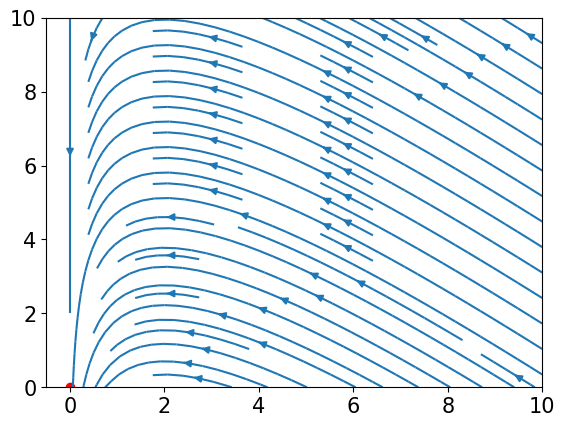

In [4]:
plt.close("all")

fixed_points = np.array([[0.,0.]])

s = np.linspace(0, 10, 10)
i = np.linspace(0, 10, 10)
S, I = np.meshgrid(s, i)

Sdot = -params['beta']*S*I
Idot =  params['beta']*S*I -params['gamma']*I
 

fig, ax = plt.subplots()
ax.streamplot(S, I, Sdot, Idot)
ax.scatter(*fixed_points.T, color="r")
fig.show()

# SEDPNR model
The SEDPNR model is the following system of linear ODEs
\begin{align}
    \frac{dS}{dt} &= \mu_1 E + \mu_2 D - \alpha S \\
    \frac{dE}{dt} &= \alpha S - (\beta_1 + \beta_2 + \gamma + \mu_1)E \\
    \frac{dD}{dt} &= \gamma E - (\beta_3 + \beta_4 + \mu_2)D \\
    \frac{dP}{dt} &= \beta_1 E + \beta_3 D - \delta_1 P \\
    \frac{dN}{dt} &= \beta_2 E + \beta_4 D - \delta_2 N \\
    \frac{dR}{dt} &= \delta_1 P + \delta_2 N
\end{align}
which models the spread of misinformation through a population. This notebook will explore some numerical analysis of this model.

In [5]:
# Initialise Params
params = dict()
params['mu_1'] = 1
params['mu_2'] = 1
params['beta_1'] = 0.4      # probability; transition from the Exposed state to the Doubter state
params['beta_2'] = 0.5      # probability; transition from the Exposed state to the Infected state
params['beta_3'] = 1        # Doubter to positively infected
params['beta_4'] = 1      # Doubter to negatively infected
params['alpha'] = 1         # Transition rate between susceptible to exposed 
params['gamma'] = 1         # Transition rate from exposed to doubter
params['delta_1'] = 0.1    # Positively infected state to the Restrained state
params['delta_2'] = 0.01   # Negatively infected state to the Restrained state

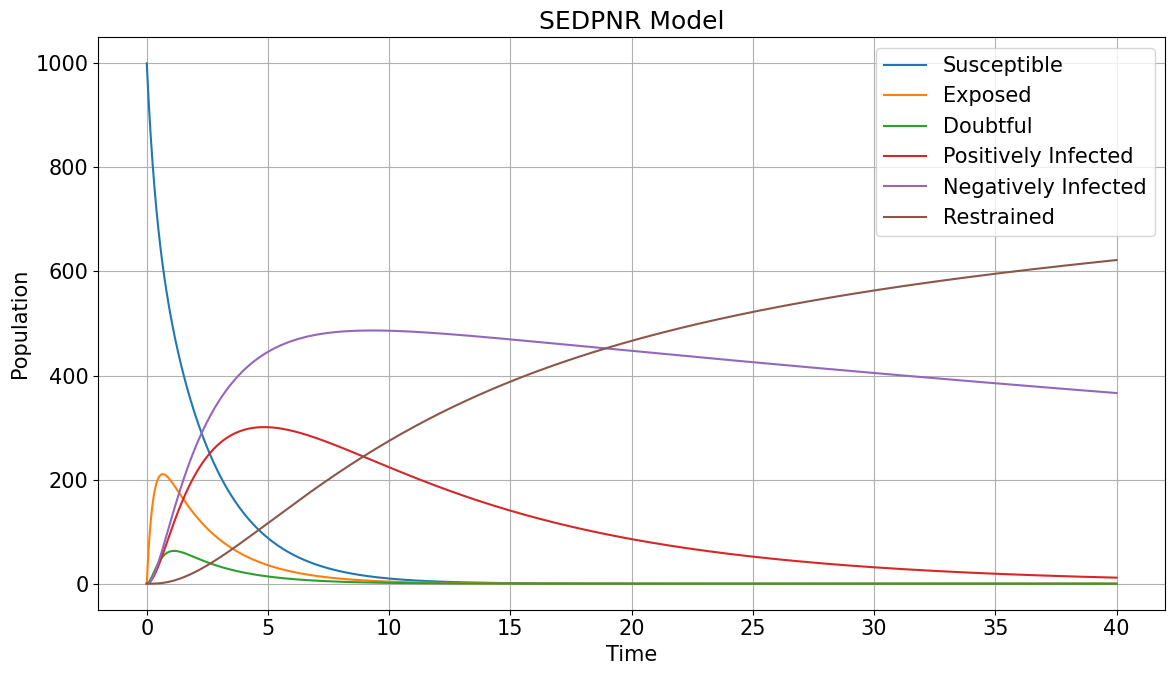

In [6]:
def SEDPNR(x,t,params = params):
    s,e,d,p,n,r = x
    mu_3 = params['beta_1'] + params['beta_2'] + params['gamma'] + params['mu_1']
    mu_4 = params['beta_3'] + params['beta_4'] + params['mu_2']

    dxdt = [params['mu_1']*e + params['mu_2']*d - params['alpha']*s, 
            params['alpha']*s - mu_3*e,
            params['gamma']*e - mu_4*d,
            params['beta_1']*e + params['beta_3']*d - params['delta_1']*p,
            params['beta_2']*e + params['beta_4']*d - params['delta_2']*n,
            params['delta_1']*p + params['delta_2']*n
            ]
    return dxdt

# Initial Condition
x0 = [1000,0.0,0.0,0.0,0.0,0.0]
t = np.linspace(0, 40, 1000)
sol = odeint(SEDPNR, x0, t)
fig, ax = plt.subplots(1,figsize = (12,7))
ax.plot(t, sol[:, 0], label='Susceptible')
ax.plot(t, sol[:, 1], label='Exposed')
ax.plot(t, sol[:, 2], label='Doubtful')
ax.plot(t, sol[:, 3], label='Positively Infected')
ax.plot(t, sol[:, 4], label='Negatively Infected')
ax.plot(t, sol[:, 5], label='Restrained')
ax.set_title(f'SEDPNR Model')
ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.grid()
plt.tight_layout()
plt.show()